**Bigram Language Model (LM)**

In this notebook, I implement the statistical bigram model that Karpathy showed in his makemore series. Credit to Karpathy for the tutorial. Note that this notebook is my exercise on reimplmenting what he did in the video, in order to aid my own learning.

In [1]:
import torch
import torch.nn.functional as F

In [2]:
text = ''

with open('names.txt', 'r', encoding = 'utf-8') as names:
    
    text = names.read().splitlines()

In [3]:
text[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
num_names  = len(text)
num_names

32033

In [5]:
transform_text = lambda words: ['.' + word + '.' for word in words] 
transformed_text = transform_text(text)
transformed_text[:10]

['.emma.',
 '.olivia.',
 '.ava.',
 '.isabella.',
 '.sophia.',
 '.charlotte.',
 '.mia.',
 '.amelia.',
 '.harper.',
 '.evelyn.']

In [7]:
vocab = sorted(list(set(''.join(transformed_text))))
vocab_len = len(vocab)
itoc = {i:c for i, c in enumerate(vocab)}
ctoi = {c:i for i, c in itoc.items()}

In [11]:
def get_bigrams(txt):
    
    bigrams = torch.ones(vocab_len, vocab_len, dtype = torch.long)
    
    for i in range(len(txt)):
        
        for ch1, ch2 in zip(txt[i], txt[i][1:]):
            
            idx1, idx2 = ctoi[ch1], ctoi[ch2]
            bigrams[idx1, idx2] += 1
    
    return bigrams

In [12]:
bigrams = get_bigrams(transformed_text)
bigrams.shape

torch.Size([27, 27])

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

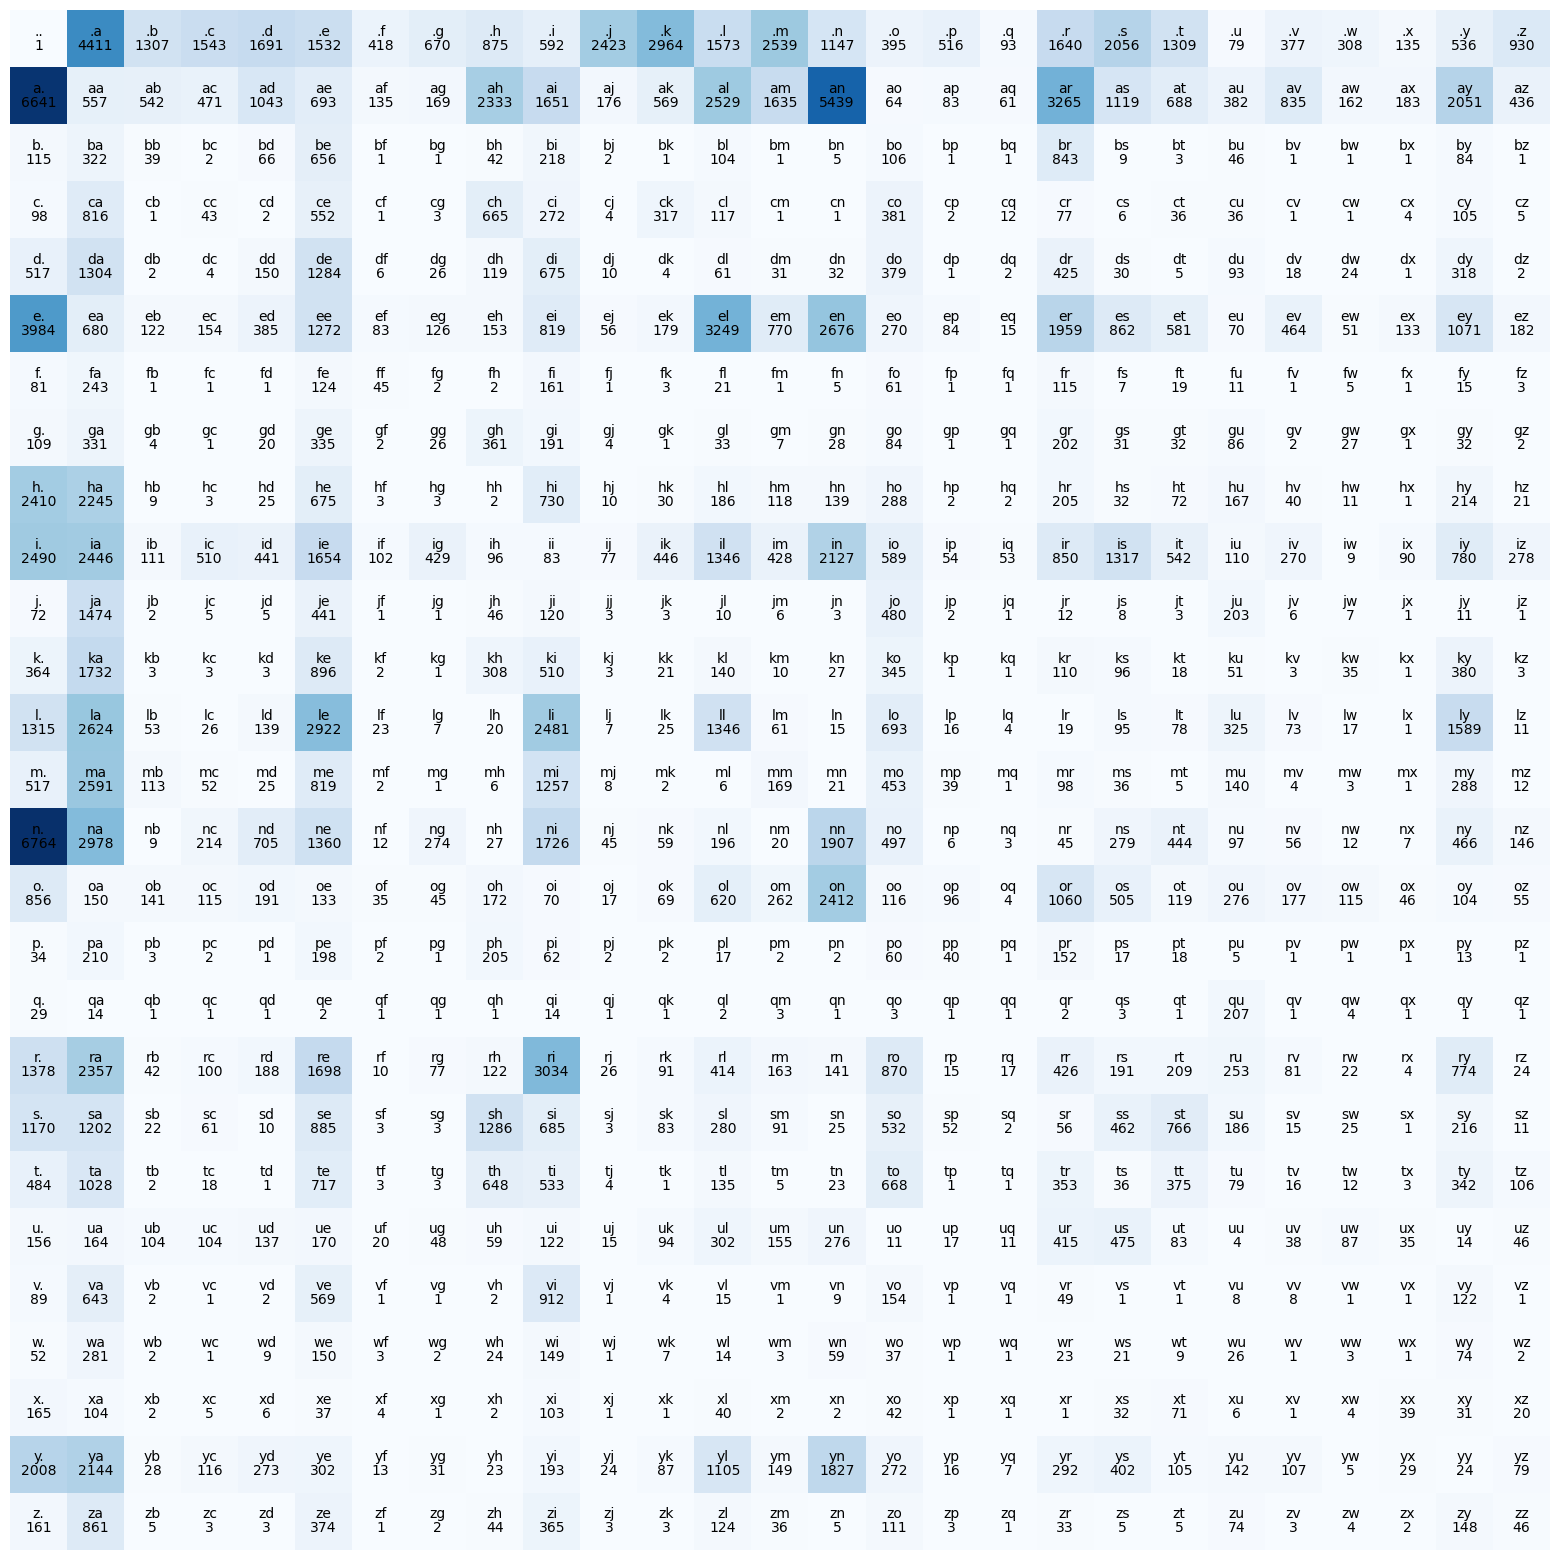

In [14]:
def plot_bigrams(grams):
    
    plt.figure(figsize = (20, 20))
    plt.imshow(grams, cmap = 'Blues')
    
    for c1_idx in range(vocab_len):
        for c2_idx in range(vocab_len):
            
            bigram = itoc[c1_idx] + itoc[c2_idx]
            count = grams[c1_idx, c2_idx].item()
            plt.text(c2_idx, c1_idx, bigram, ha = 'center', va = 'bottom')
            
            if grams.dtype != torch.int32 and grams.dtype != torch.int64 and grams.dtype != torch.long:
                plt.text(c2_idx, c1_idx, f"{count:.2f}", ha = 'center', va = 'top')
            
            else:
                plt.text(c2_idx, c1_idx, count, ha = 'center', va = 'top')
    
    plt.axis('off')    

plot_bigrams(bigrams)    

In [15]:
floaty_bigrams = bigrams.float()
floaty_bigrams[0]

tensor([1.0000e+00, 4.4110e+03, 1.3070e+03, 1.5430e+03, 1.6910e+03, 1.5320e+03,
        4.1800e+02, 6.7000e+02, 8.7500e+02, 5.9200e+02, 2.4230e+03, 2.9640e+03,
        1.5730e+03, 2.5390e+03, 1.1470e+03, 3.9500e+02, 5.1600e+02, 9.3000e+01,
        1.6400e+03, 2.0560e+03, 1.3090e+03, 7.9000e+01, 3.7700e+02, 3.0800e+02,
        1.3500e+02, 5.3600e+02, 9.3000e+02])

In [16]:
bigram_probs = floaty_bigrams/floaty_bigrams.sum(dim = -1, keepdims = True)

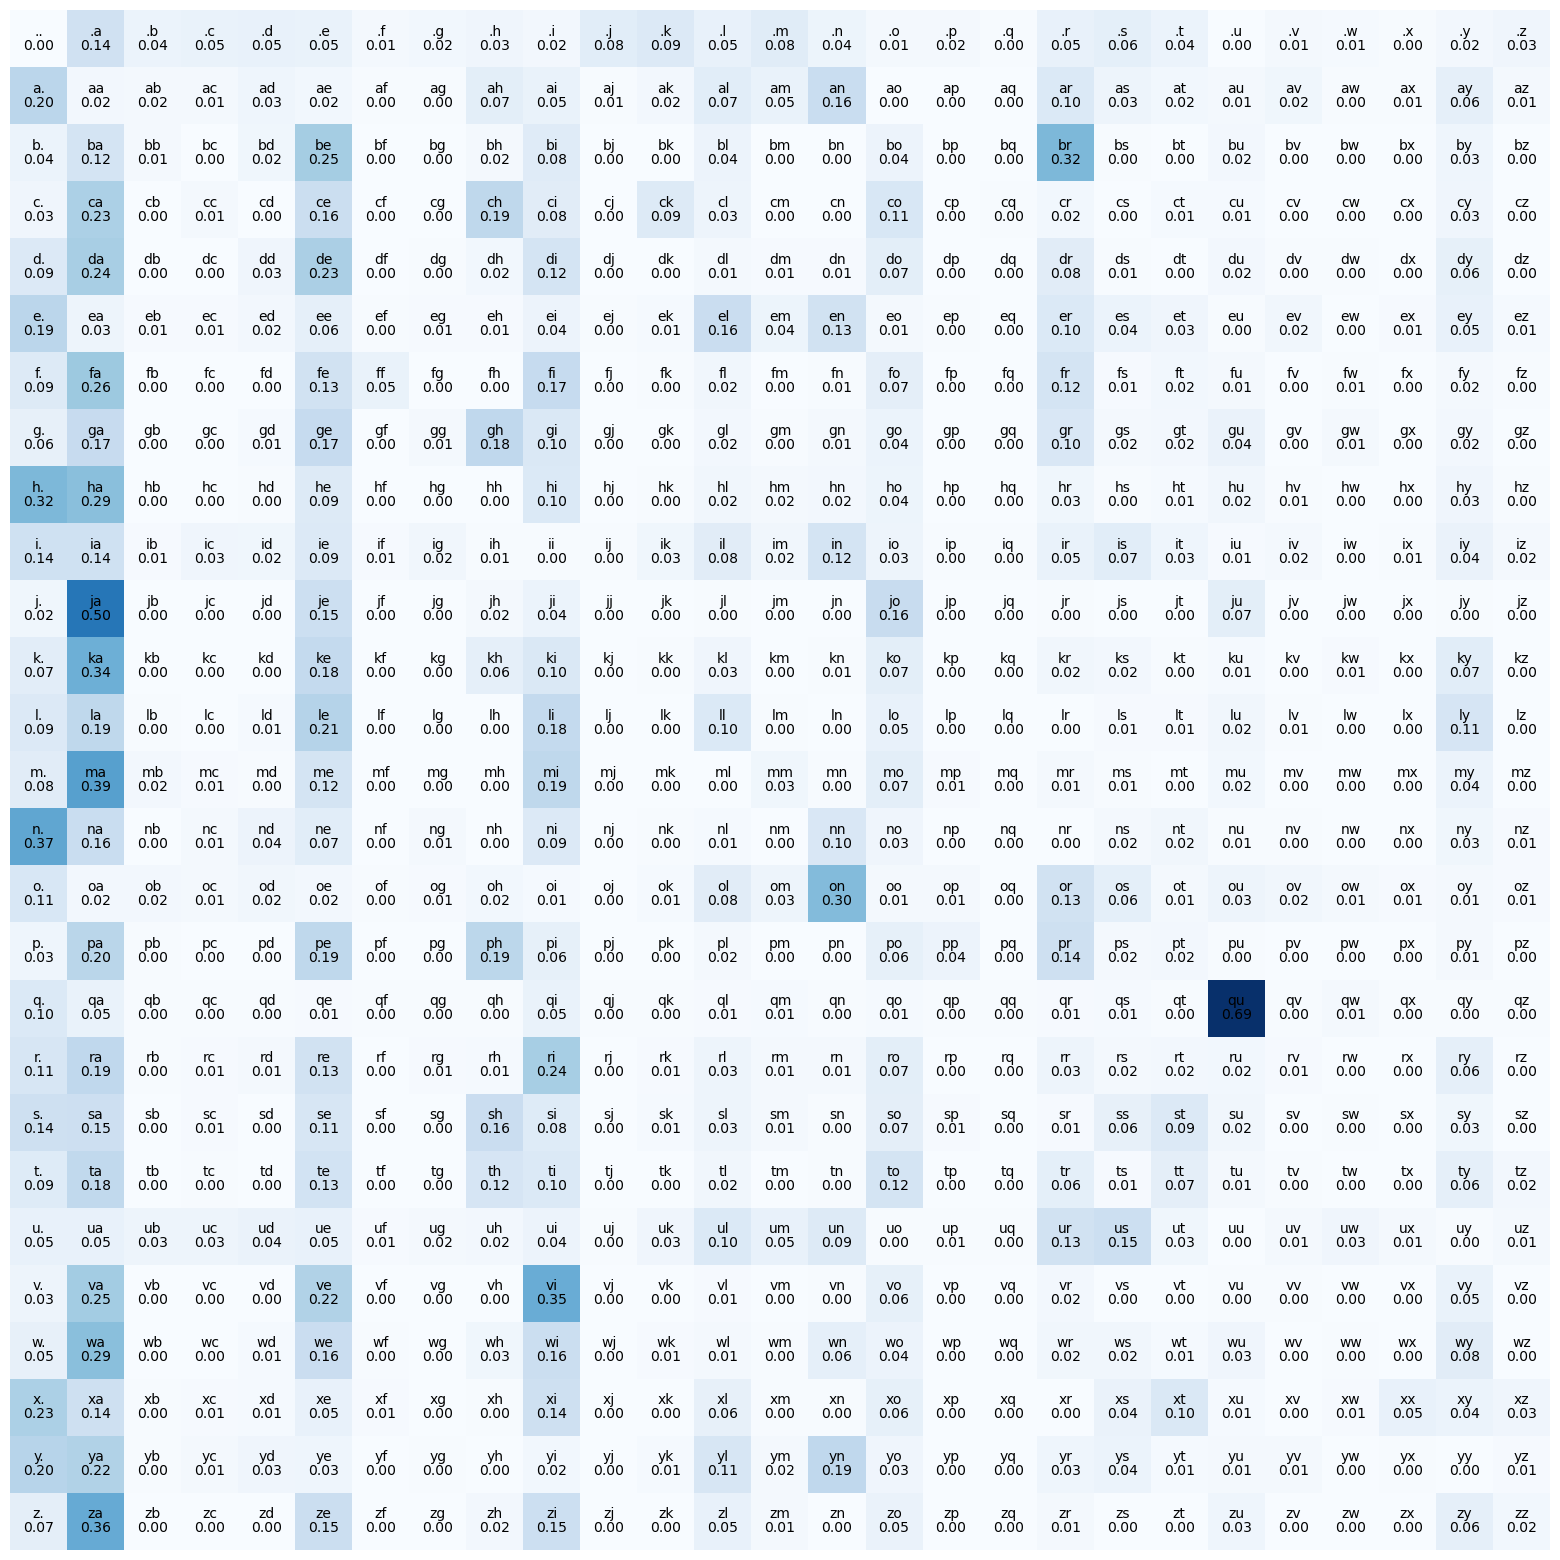

In [17]:
plot_bigrams(bigram_probs)

In [18]:
def generate(input_chr, max_len = 10):
    
    idx = ctoi[input_chr]
    
    if input_chr != '.':
        print(input_chr, end='')
    else:
        do_nothing = 'do_nothing'
    
    for i in range(max_len):
        idx = torch.multinomial(bigram_probs[idx], num_samples = 1, replacement = True).item()
        
        if idx == 0:
            return
        
        char = itoc[idx]
        print(char, end='')
        

In [19]:
generate('a')

aakala

In [25]:
times = 1

for i in range(times):
    for j in range(27):
        c = itoc[j]
        generate(c)
        print()

ananin
amubai
barydstisha
calfrah
d
ena
fan
gnn
har
in
jhiyldriram
k
ly
mibe
na
onya
pa
qxonanndann
riencileeru
sorist
ti
umillaal
vosobrattre
wanavymeeon
xdikae
ynialure
zyn


In [28]:
def nll(word):
    
    n = 0
    log_likelihood = 0
    
    for c1, c2 in zip(word, word[1:]):
        
        i1 = ctoi[c1]
        i2 = ctoi[c2]
        prob = bigram_probs[i1, i2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
    
    nll = -log_likelihood
    avg_nll = nll/n
    
    return log_likelihood, nll, avg_nll

In [29]:
log_likelihood, nll_loss, avg_nll = nll(transformed_text[15])

print(f'{log_likelihood=}')
print(f'{nll_loss=}')
print(f'{avg_nll=}')


log_likelihood=tensor(-13.9380)
nll_loss=tensor(13.9380)
avg_nll=tensor(2.3230)
